TASK目标：通过本案例联系掌握两个重要的技巧：

（1）以分词为核心的中文文本处理能力；

（2）以word-2-vector模型为核心的文本量化能力。并在此基础上形成任意模型。用50%数据做训练，50%数据做验证，汇报完整建模过程，以及最终的外样本预测精度。


具体要求：

（1）所有代码详细注释；

（2）如果（不是必须）涉及深度学习模型，需要清点模型参数个数；

（3）外样本预测精度不用Mean Sqared Error（因为可能有大量异常值），而用Median Squared Error (MedSE)；

（4）实验重复100次，产生100个MedSE值，对其做箱线图和直方图，并汇报中位数；

（5）最后得分为：50%过程分+50%预测精度得分。

<center> <h1> Word Embedding：文本语义的数学表达 </h1> </center>

#   如何理解词与词的相关性？


> 词与词的相关性可以有多种不同的理解，比如：（1）两个词经常同时出现，说明它们之间的相关性较强，像“周末+加班”；（2）两个词可能不会同时出现，但是在“语义”上非常相似，比如“苹果”和“橘子”，都是水果的一种，“酒店”和“宾馆”表示的同一个事物








# 如何判断两个词在语义上相似呢？

> 语义上的相关性可以通过词语在“上下文的位置”来判断：如果两个词经常出现在相似的上下文中，那两个词的语义比较相似


# 语义相似性的“直观”表示

> 假设某种方法可以将词语的语义直观的展示在坐标轴中，那语义相似的词语会靠的比较近



# 从自然语言到数学语言

> 为了根据语义刻画词语在坐标轴的位置，就需要将“自然语言”转化为“数学语言”，即给每个词语一组向量表示

> 这种用“向量”表示“语义”的方法，就是Word Embedding



# 数据介绍

> 我们使用的数据是携程网上的7000多条酒店评论数据

> 下载地址：https://github.com/SophonPlus/ChineseNlpCorpus/blob/master/datasets/ChnSentiCorp_htl_all/intro.ipynb




# 数据读入

In [1]:
import pandas as pd     # 导入pandas库
data = pd.read_csv('data/Comment.csv')   # 导入酒店评论数据
data.head()    # 查看前5行

,label,review
0,1,"距离川沙公路较近,但是公交指示不对,如果是""蔡陆线""的话,会非常麻烦.建议用别的路线.房间较..."
1,1,商务大床房，房间很大，床有2M宽，整体感觉经济实惠不错!
2,1,早餐太差，无论去多少人，那边也不加食品的。酒店应该重视一下这个问题了。房间本身很好。
3,1,宾馆在小街道上，不大好找，但还好北京热心同胞很多~宾馆设施跟介绍的差不多，房间很小，确实挺小...
4,1,"CBD中心,周围没什么店铺,说5星有点勉强.不知道为什么卫生间没有电吹风"


# 中文分词

有可能您的计算环境中，没有安装jieba这个包包。

这会让您在下面的代码执行错误。

如果发生该现象，请在终端（小黑窗）输入执行下面两句代码

conda activate py37_tensorflow

pip install jieba

In [2]:
import jieba    # 导入分词软件
train_data = []   # 建立空列表存数据
for line in data.review:     # 取某一行
    line_fenci = jieba.lcut(line)   # 分词
    train_data.append(line_fenci)   # 附加空列表中

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.662 seconds.
Prefix dict has been built successfully.


# 分词之后的结果长什么样？

In [3]:
print(train_data[0])    # 打印第一个列表
print(train_data[1])    # 打印第二个列表
print(train_data[2])    # 打印第三个列表

['距离', '川沙', '公路', '较近', ',', '但是', '公交', '指示', '不', '对', ',', '如果', '是', '"', '蔡陆线', '"', '的话', ',', '会', '非常', '麻烦', '.', '建议', '用', '别的', '路线', '.', '房间', '较为简单', '.']
['商务', '大床', '房', '，', '房间', '很大', '，', '床有', '2M', '宽', '，', '整体', '感觉', '经济', '实惠', '不错', '!']
['早餐', '太', '差', '，', '无论', '去', '多少', '人', '，', '那边', '也', '不加', '食品', '的', '。', '酒店', '应该', '重视', '一下', '这个', '问题', '了', '。', '房间', '本身', '很', '好', '。']


# Word Embedding - 基本原理

> Word Embedding （词嵌入），是指将词语“嵌入”到一个共同的空间中进行比较

> 为了将词语嵌入到某个空间中，就需要为每个词语“分配”一个“词向量”

> 根据上下文的词来预测目标词出现的概率



# Word Embedding 程序实现


In [4]:
from gensim.models import Word2Vec    # 导入函数
# size表示词向量的大小，min_count表示最少的词频，低于此词频的词会被忽略掉
model = Word2Vec(train_data, size=100, min_count=1)   # 模型输入

# 展示学习好的词向量 

In [5]:
print(len(model['酒店']))    # 打印拟合元素为“酒店”的模型长度
model['酒店']                # 输出该元素内容

100


/anaconda/envs/py37_tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/anaconda/envs/py37_tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([ 0.4779667 , -0.55352837,  0.5858705 , -0.02616989, -0.85960567,
        0.63875896, -0.45202884,  0.15306237, -0.65110713, -0.21434826,
       -0.6711334 ,  0.2794752 ,  2.1497152 , -1.1701213 ,  0.23793352,
        0.36066642,  0.3559573 ,  0.8259308 ,  0.47765446,  0.35968092,
       -1.15584   ,  0.37555584,  0.60960597,  0.06753001,  0.3175832 ,
       -0.98576957,  0.8956984 ,  1.0523698 , -1.3979478 , -0.24714908,
        0.994285  , -1.2568508 , -0.23182367,  1.6792676 , -0.06917895,
        0.4414267 , -1.4733431 ,  1.0075239 ,  1.5337375 ,  1.447736  ,
       -0.30351737, -0.4038807 , -1.2758311 ,  0.98617756,  0.4804772 ,
        0.08010791,  0.6266053 ,  1.4158839 ,  0.7996716 ,  0.31318828,
       -0.26011762, -2.0014722 , -0.57217383,  0.28269264,  0.8041437 ,
       -0.3136659 ,  0.6074194 , -1.4109305 , -0.33846793,  0.71626896,
        0.6720079 ,  0.9789441 , -0.04262506, -0.8094707 ,  0.5430507 ,
       -0.6425928 , -0.46381074,  0.24475147, -1.4258884 ,  1.54

# Word Embedding应用：判断任意两个词的相似度

In [6]:
from scipy import stats  # 导入库
import numpy as np

x1=model['酒店']   # 模型拟合
x2=model['饭店']   # 模型拟合
x3=model['不错']   # 模型拟合
x4=model['挺不错']  # 模型拟合

print(model.similarity('酒店', '饭店'))   # 计算2词直接的相似性
print(model.similarity('酒店', '不错'))    # 计算2词直接的相似性
print(model.similarity('挺不错', '不错'))   # 计算2词直接的相似性
r=np.mean(x3*x4)/np.sqrt(np.mean(x3**2)*np.mean(x4**2))    # 计算

model.similar_by_word("不错")    # 输出与“不错”最相似的结果

0.7939849
0.53584844
0.8970798


/anaconda/envs/py37_tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.
/anaconda/envs/py37_tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/anaconda/envs/py37_tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
/anaconda/envs/py37_tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
/anaconda/envs/py37_tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call t

[('挺不错', 0.8970798254013062),
 ('比较满意', 0.8858372569084167),
 ('行', 0.885407567024231),
 ('一般', 0.869199812412262),
 ('不怎么样', 0.8678579330444336),
 ('稍差', 0.8634871244430542),
 ('快餐', 0.86090087890625),
 ('合理', 0.8560066223144531),
 ('说得过去', 0.8538315296173096),
 ('还好', 0.8505702018737793)]

# NLP - Personalized Recommendation

In [1]:
import pandas as pd   
from gensim.models import Word2Vec
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')

读入数据retail.csv，其中有以下注意事项： 

（1）有不少的销售记录没有customerid，因此前后购买记录没法建立联系，需要删除（建议尝试：sum(records.customerid.isnull())） 

（2）每一个customerid的数据类型是float65，不好处理，因此需要强制编程整数（建议尝试：type(records.customerid[0])）

In [2]:
records = pd.read_csv("F:/大三（上）/深度学习/TASK6.1：Wod-2-Vector - SEM关键词展现量预测/retail.csv")
keepid=records.customerid.notnull()     # 删除空值
records=records[keepid]              # 提取元素
records['customerid'] = records['customerid'].map(int)   # 转化数据类型
records

,customerid,itemid,description,price
0,13085,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,6.95
1,13085,79323P,PINK CHERRY LIGHTS,6.75
2,13085,79323W,WHITE CHERRY LIGHTS,6.75
3,13085,22041,"RECORD FRAME 7"" SINGLE SIZE",2.10
4,13085,21232,STRAWBERRY CERAMIC TRINKET BOX,1.25
...,...,...,...,...
525456,17530,22271,FELTCRAFT DOLL ROSIE,2.95
525457,17530,22750,FELTCRAFT PRINCESS LOLA DOLL,3.75
525458,17530,22751,FELTCRAFT PRINCESS OLIVIA DOLL,3.75
525459,17530,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,3.75


创建一个关于itemid和description的字典

In [3]:
product_dictionary=dict(zip(records.itemid,records.description))   # 打包字典
M=len(product_dictionary)   # 计算长度
product_dictionary      # 打印字典

{'85048': '15CM CHRISTMAS GLASS BALL 20 LIGHTS',
 '79323P': 'PINK CHERRY LIGHTS',
 '79323W': 'WHITE CHERRY LIGHTS',
 '22041': 'RECORD FRAME 7" SINGLE SIZE ',
 '21232': 'STRAWBERRY CERAMIC TRINKET BOX',
 '22064': 'PINK DOUGHNUT TRINKET POT ',
 '21871': 'SAVE THE PLANET MUG',
 '21523': 'DOORMAT FANCY FONT HOME SWEET HOME',
 '22350': 'ILLUSTRATED CAT BOWL ',
 '22349': 'DOG BOWL CHASING BALL DESIGN',
 '22195': 'LARGE HEART MEASURING SPOONS',
 '22353': 'LUNCH BOX WITH CUTLERY FAIRY CAKES ',
 '48173C': 'DOORMAT BLACK FLOCK ',
 '21755': 'LOVE BUILDING BLOCK WORD',
 '21754': 'HOME BUILDING BLOCK WORD',
 '84879': 'ASSORTED COLOUR BIRD ORNAMENT',
 '22119': 'PEACE WOODEN BLOCK LETTERS',
 '22142': 'CHRISTMAS CRAFT WHITE FAIRY ',
 '22296': 'HEART IVORY TRELLIS LARGE',
 '22295': 'HEART FILIGREE DOVE LARGE',
 '22109': 'FULL ENGLISH BREAKFAST PLATE',
 '22107': 'PIZZA PLATE IN BOX',
 '22194': 'BLACK DINER WALL CLOCK',
 '35004B': 'SET OF 3 BLACK FLYING DUCKS',
 '82582': 'AREA PATROLLED METAL SIGN',
 '21

为了演示方便，做一个非常粗糙但是可能很不合理的假设。 我们假设这个数据提供的，基于同一个customerid的购买记录是有顺序 关系的。那么，我们就可以把itermid看做是一个类似于文本的 序列数据，可以尝试使用word2vec模型。 因此，需要首先将所有的购买记录根据customerid分组

In [4]:
train_list = []     # 建立空列表
groups = records.groupby('customerid')    # 分组
for group in groups:
    temp_df = group[1]       # 提取元素
    my_records = list(temp_df['itemid'])    # 构建列表
    train_list.append(my_records)           # 添加到空列表
train_list[0]                              # 打印列表

['TEST001',
 'TEST001',
 'TEST001',
 'TEST001',
 'TEST002',
 'TEST001',
 'TEST001',
 'TEST001',
 'TEST001',
 'ADJUST',
 '20682',
 '20679',
 '15056N',
 '15056BL',
 '15056P',
 '21524',
 '22692',
 '22660',
 '22687',
 '48173C',
 '22691',
 '48111',
 '22690',
 '21523',
 '48138',
 '22689',
 '22365',
 '48185',
 '22688',
 '48188',
 '48187',
 '22366',
 '20685',
 '21955',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'D',
 'TEST001']

尝试建立一个100维的word2vec模型

In [5]:
DIM=100    # 设立维度
model = Word2Vec(train_list, size=DIM, min_count=1)    # 模型建立

首先获得所有不通的word（通过index2word），计算这些WORD的个数，获得他们的空间坐标Z

In [6]:
products=model.wv.index2word    # 模型调研
M=len(products)                 # 计算长度
Z=model[products]               # 设置模型元素
Z[0:3]                         # 打印列表

array([[ 0.64142764, -0.12151847,  0.283735  ,  0.8760767 ,  0.2111246 ,
        -0.21458533, -0.387277  , -0.9541201 ,  0.04498236,  0.85430354,
         0.38846955,  0.55404586,  0.50015104, -0.45160267, -0.43055737,
        -0.6586711 , -0.1223806 ,  0.6634704 , -0.07301805, -0.24491575,
        -0.23016156, -1.0702176 , -0.63186556, -0.52576923, -0.5732349 ,
         0.6393819 , -0.4793257 ,  0.35970706,  0.01755434, -0.27413034,
        -0.31692272, -0.74574864,  0.5125053 , -0.5739702 ,  0.033603  ,
         0.21602231, -0.21184759, -1.0250087 ,  0.9766222 , -0.28887644,
        -0.20086497,  0.320183  ,  0.520856  , -1.0304912 ,  0.11483935,
        -0.40349317, -0.33167094, -0.07318869, -0.7638836 ,  0.40819347,
         0.42095935, -0.9233155 ,  0.18878882,  0.56585807, -0.2154034 ,
        -0.46314165,  0.5949456 , -0.6764075 , -0.7534002 , -0.60770464,
        -0.61932063,  0.20419332,  0.9132327 , -0.35003224, -0.03646546,
        -0.55970645,  0.6423672 ,  0.48929498, -0.6

每一个消费者可能购买多个商品。每个商品有一个空间坐标 然后，将多个空间坐标求均值，用于描述该消费者的空间位置

In [7]:
N=len(train_list)    # 计算训练集长度
X=np.zeros([N,DIM])   # 构建以0填充的2维矩阵
for i in range(N):
    my_records=train_list[i]   # 训练集元素索引
    my_state=model[my_records]  # 模型调用
    X[i]=np.mean(my_state,0)    # 均值计算

任意指定MyID号顾客，打印他的消费记录

In [8]:
MyID=20      # 指定顾客编号
my_records=train_list[MyID]     # 训练集中索引元素
for i in range(len(my_records)): print(product_dictionary[my_records[i]])    # 列表输出

POSTAGE
ROUND SNACK BOXES SET OF4 WOODLAND 
RED RETROSPOT PICNIC BAG
SET/20 WOODLAND PAPER NAPKINS 
SET/20 RED RETROSPOT PAPER NAPKINS 
RETROSPOT LARGE MILK JUG
LUNCH BAG RED RETROSPOT
RED RETROSPOT CUP
GREEN POLKADOT CUP
JUMBO BAG RED RETROSPOT
WOODLAND CHARLOTTE BAG
RED RETROSPOT CHARLOTTE BAG
LUNCH BAG WOODLAND
WOODLAND DESIGN  COTTON TOTE BAG
MUSHROOM BLUE HOT WATER BOTTLE
RED RETROSPOT PURSE 
RED SPOTTY TABLECLOTH 
RED RETROSPOT TRADITIONAL TEAPOT 
JUMBO BAG WOODLAND ANIMALS
LUNCH BAG CARS BLUE
RED RETROSPOT SHOPPER BAG
RETROSPOT CHILDRENS APRON
RED RETROSPOT CUP
RED POLKADOT PUDDING BOWL
RED POLKADOT BEAKER 
RED POLKADOT COFFEE  MUG
RED RETROSPOT TRADITIONAL TEAPOT 
RETROSPOT LARGE MILK JUG
RED RETROSPOT MUG
ROUND SNACK BOXES SET OF4 WOODLAND 
ROUND SNACK BOXES SET OF 4 SKULLS
SKULLS PARTY BAG + STICKER SET
RED RETROSPOT SHOPPER BAG
CHARLOTTE BAG SUKI DESIGN
SUKI  SHOULDER BAG
ROUND SNACK BOXES SET OF 4 FRUITS 
POSTAGE


计算该消费者的空间坐标位置与其他各个产品之间的距离位置，并寻找最近的产品

In [9]:
mystate=X[MyID]    # 定义基于顾客编号的索引
similarity=Z-np.dot(np.ones([M,1]),mystate.reshape([1,DIM]))  # 计算相似度
similarity=np.mean(similarity**2,1)     # 计算相似度均值
TopProd=sorted(zip(similarity,products))   # 压缩并排序
TopProd=TopProd[0][1]              # 定义索引
TopProd=product_dictionary[TopProd]   # 打包成字典
TopProd 

'RED RETROSPOT SHOPPING BAG'

# NLP - SEM Keyword Prediction

In [10]:
import jieba         # 导入库
import pandas as pd
import collections
from gensim.models import Word2Vec
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from operator import itemgetter
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

读入SEM数据。第一列是关键词文本，第二列是对数变化后的平均展现量

In [11]:
SEM=pd.read_csv("F:/大三（上）/深度学习/TASK6.1：Wod-2-Vector - SEM关键词展现量预测/SEM.csv")
SEM    # 导入数据

,kw,logImp
0,1.5折机票,2.302585
1,10.1机票,1.609438
2,10.1机票查询,1.791759
3,10.1特价机票,1.568616
4,10月份特价机票,2.036882
...,...,...
4836,最低折扣机票,3.786373
4837,最低折扣机票查询,2.826656
4838,最好的机票网站,1.845827
4839,最好的机票预订网站,1.386294


利用jieba分词： 

（1）wdtrain是一个长度为样本量的list，每一个元素又是一个list，其中每一个元素是分词后的最基本的词。 

（2）wdlist是一个长度不确定的list，它是把所有的样本的分词结果全部都串在一起了

In [12]:
wdtrain=[];wdlist=[]     # 建立空列表
for kw in SEM.kw:
    wd=jieba.lcut(kw)    # 分词
    wdtrain.append(wd)    # 添加入列表
    wdlist=wdlist+wd      # 合并所有产生的列表

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\hp\AppData\Local\Temp\jieba.cache
Loading model cost 0.823 seconds.
Prefix dict has been built successfully.


通过对wdlist的各种操作，找到每个【词根】出现的频率，并降序排列

In [13]:
tab=collections.Counter(wdlist)     
df = pd.DataFrame.from_dict(tab,orient="index").reset_index()   # 转化成数据框
df = df.rename(columns={'index':'kw', 0:'count'})   # 重命名
df = df.sort_values(by='count',ascending=False)    # 排序

生成一个字典，将词根变为整数，从0开始到ncov结束

In [14]:
ncov=len(df.kw)    # 计算长度
topkw=list(df.kw)   # 转化成列表
mydict=dict.fromkeys(topkw)  #会造一个value是空的字典
for i in range(ncov):
    mydict[topkw[i]]=i   # 循环打印
mydict 

{'机票': 0,
 '飞机票': 1,
 '特价机票': 2,
 '查询': 3,
 '预订': 4,
 '便宜': 5,
 '-': 6,
 '打折': 7,
 '特价': 8,
 '到': 9,
 '深圳': 10,
 '北京': 11,
 '航班': 12,
 '广州': 13,
 '的': 14,
 '上海': 15,
 '网站': 16,
 '预定': 17,
 '网': 18,
 '订': 19,
 '飞机': 20,
 '网上': 21,
 '订机票': 22,
 '机票价格': 23,
 '三亚': 24,
 '价格': 25,
 '订票': 26,
 '买': 27,
 '十一': 28,
 '五一': 29,
 '折扣': 30,
 '南京': 31,
 '厦门': 32,
 '订购': 33,
 '重庆': 34,
 '武汉': 35,
 '天津': 36,
 '海口': 37,
 '长沙': 38,
 '昆明': 39,
 '去': 40,
 '最': 41,
 '哈尔滨': 42,
 '多少': 43,
 '定': 44,
 '大连': 45,
 '乌鲁木齐': 46,
 '钱': 47,
 '哪个': 48,
 '杭州': 49,
 '哪里': 50,
 '旅游': 51,
 '郑州': 52,
 '长春': 53,
 '官网': 54,
 '南宁': 55,
 '济南': 56,
 '电话': 57,
 '呼和浩特': 58,
 '机票网': 59,
 '成都': 60,
 '西安': 61,
 '南昌': 62,
 '票价': 63,
 '时刻表': 64,
 '珠海': 65,
 '烟台': 66,
 '春节': 67,
 '低价': 68,
 '太原': 69,
 '端午节': 70,
 '北京机票': 71,
 '自助游': 72,
 '什么': 73,
 '西双版纳': 74,
 '沈阳': 75,
 '廉价': 76,
 '往返机票': 77,
 '哪儿': 78,
 '青岛': 79,
 '攻略': 80,
 '好': 81,
 '怎么': 82,
 '成都机票': 83,
 '放假': 84,
 '携程网': 85,
 '优惠机票': 86,
 '2013': 87,
 '西安机票': 88,
 '如何': 89,
 

生成一个X的0-1矩阵。如果一个关键词包含相应词根，那么对应的X元素取值为1，否则为0

In [15]:
ss=len(SEM.kw)   # 计算列表长度
ncov=len(mydict)   # 计算列表长度
X=np.zeros([ss,ncov+1])  # 构建以0填充的数组
for i in range(ss):
    columnID=itemgetter(*wdtrain[i])(mydict)    
    X[i,columnID]=1              # 赋值
    X[i,ncov]=len(SEM.kw[i])    # 计算长度

In [16]:
X  # 打印出数组

array([[1., 0., 0., ..., 0., 0., 6.],
       [1., 0., 0., ..., 0., 0., 6.],
       [1., 0., 0., ..., 0., 0., 8.],
       ...,
       [1., 0., 0., ..., 0., 0., 7.],
       [1., 0., 0., ..., 0., 0., 9.],
       [0., 0., 0., ..., 0., 0., 5.]])

做一个最普通的线性回归，看看外样本的预测精度。外样本的预测精度其实是非常不稳定的，充满了异常值。因此，没有用均值，而是采用的中位数。

In [17]:
Y=np.array(SEM.logImp)       # 构建数组
Y=(Y-np.mean(Y))/np.std(Y)   # 标准化数据
niter=1000                   # 参数设置
R21=np.zeros(niter)          # 构建1000个以0填充的1维数组
regmodel = LinearRegression()    # 设置线性回归模型
for i in range(niter):
    X0,X1,Y0,Y1= train_test_split(X,Y,test_size=0.5,random_state=i)  # 拆分数据集
    regmodel.fit(X0,Y0)     # 模型调用
    Yhat=regmodel.predict(X1)   # 模型预测
    R21[i]=100.0*(1-np.median((Yhat-Y1)**2))   # 计算中位数
np.round(np.median(R21),2)   # 输出中位数

72.77

接下来做一个word2vec模型，假设laten空间的维数为100

In [18]:
DIM=100
wvmodel = Word2Vec(wdtrain, size=DIM, min_count=1)   # 函数设置
Z=np.zeros([ss,DIM])    # 构建以0填充的2维数组
for i in range(ss):
    vec=wvmodel[wdtrain[i]]   # 训练
    Z[i,:]=np.mean(vec,0)   # 计算均值

把word2vect学习出来的空间坐标的平均值作为一个新的解释性变量Z与前面的X整合，形成新的矩阵XZ，然后做Y对XZ的回归分析，并检测外样本预测精度

In [19]:
XZ=np.hstack((X,Z))   # 将矩阵进行行连接
niter=1000        # 参数设置
R22=np.zeros(niter)   # 构建以0填充的1维数组
regmodel = LinearRegression()    # 构建1000个以0填充的1维数组
for i in range(niter):
    XZ0,XZ1,Y0,Y1= train_test_split(XZ,Y,test_size=0.5,random_state=i)  # 训练集拆分
    regmodel.fit(XZ0,Y0) # 模型调用
    Yhat=regmodel.predict(XZ1)   # 模型预测
    R22[i]=100.0*(1-np.median((Yhat-Y1)**2))   # 计算中位数
np.round(np.median(R22),2)     # 输出中位数

75.92

对两个不同的模型，多次随机模型的重复结果，做箱线图对比如下。结果令人振奋！

{'whiskers': [<matplotlib.lines.Line2D at 0x2c0a7d72208>,
 'caps': [<matplotlib.lines.Line2D at 0x2c0a07671c8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c0a7d8cb88>,
 'medians': [<matplotlib.lines.Line2D at 0x2c0a7d79388>,
 'fliers': [<matplotlib.lines.Line2D at 0x2c0a7d79548>,
 'means': []}

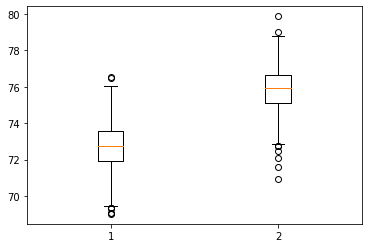

In [20]:
plt.boxplot((R21,R22))  # 绘制箱线图

([array([ 14.,  91., 233., 353., 241.,  63.,   5.,   0.,   0.,   0.]),
  array([  0.,   1.,   2.,  15.,  89., 270., 366., 217.,  38.,   2.])],
 array([69.01098546, 70.09760916, 71.18423287, 72.27085658, 73.35748028,
        74.44410399, 75.5307277 , 76.6173514 , 77.70397511, 78.79059881,
        79.87722252]),
 <a list of 2 Lists of Patches objects>)

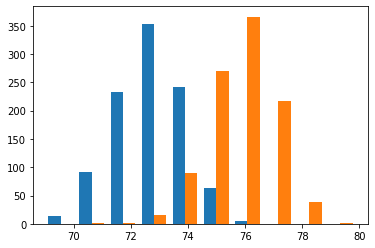

In [21]:
plt.hist((R21,R22))  # 绘制直方图